# **CUSTOMER CHURN PREDICTION**
## **Samuel Lunghe**

In [658]:
from google.colab import drive
drive.mount("/content/MyDrive")

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


## **Import Dataset**

In [659]:
import pandas as pd
filepath="/content/MyDrive/MyDrive/ColabNotebooks/CODSOFT/CUSTOMER CHURN PREDICTION/Churn_Modelling.csv"
data=pd.read_csv(filepath)

In [660]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [661]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [662]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


(10000, 14)

In [663]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [664]:
target=data["Exited"]
IDs=data["CustomerId"]

## **Data Preprocessing and Visualization**

In [665]:
import pandas as pd

def missing_values_summary(df):
    # Calculate total missing values in each column
    total_missing = df.isnull().sum()

    # Calculate percentage of missing values in each column
    total_rows = len(df)
    percentage_missing = (total_missing / total_rows) * 100

    # Create DataFrame to store the summary
    summary_df = pd.DataFrame({
        'Column Name': total_missing.index,
        'Total Missing Values': total_missing.values,
        'Percentage Missing': percentage_missing.values
    })

    return summary_df

missing_values_summary(data)

,Column Name,Total Missing Values,Percentage Missing
0,RowNumber,0,0.0
1,CustomerId,0,0.0
2,Surname,0,0.0
3,CreditScore,0,0.0
4,Geography,0,0.0
5,Gender,0,0.0
6,Age,0,0.0
7,Tenure,0,0.0
8,Balance,0,0.0
9,NumOfProducts,0,0.0


In [666]:
import pandas as pd

def value_counts_summary(df):
    column_names = []
    value_counts_dicts = []
    total_value_counts = []

    # Iterate over each column in the DataFrame
    for column in df.columns:
        # Get value counts dictionary for the column
        value_counts = df[column].value_counts().to_dict()
        # Calculate total number of keys (unique values) in the value counts dictionary
        total_counts = len(value_counts)
        # Append column name, value counts dictionary, and total value counts
        column_names.append(column)
        value_counts_dicts.append(value_counts)
        total_value_counts.append(total_counts)

    # Create DataFrame to store the summary
    summary_df = pd.DataFrame({
        'Column Name': column_names,
        'Value Counts': value_counts_dicts,
        'Total Value Counts': total_value_counts
    })

    return summary_df

value_counts_summary(data)


,Column Name,Value Counts,Total Value Counts
0,RowNumber,"{1: 1, 6671: 1, 6664: 1, 6665: 1, 6666: 1, 666...",10000
1,CustomerId,"{15634602: 1, 15667932: 1, 15766185: 1, 156676...",10000
2,Surname,"{'Smith': 32, 'Scott': 29, 'Martin': 29, 'Walk...",2932
3,CreditScore,"{850: 233, 678: 63, 655: 54, 705: 53, 667: 53,...",460
4,Geography,"{'France': 5014, 'Germany': 2509, 'Spain': 2477}",3
5,Gender,"{'Male': 5457, 'Female': 4543}",2
6,Age,"{37: 478, 38: 477, 35: 474, 36: 456, 34: 447, ...",70
7,Tenure,"{2: 1048, 1: 1035, 7: 1028, 8: 1025, 5: 1012, ...",11
8,Balance,"{0.0: 3617, 130170.82: 2, 105473.74: 2, 85304....",6382
9,NumOfProducts,"{1: 5084, 2: 4590, 3: 266, 4: 60}",4


In [667]:
import matplotlib.pyplot as plt

def plot_colored_bar_chart(df, column, color_mapping):
    # Get unique values in the column
    unique_values = df[column].unique()

    # Create the bar plot
    plt.figure(figsize=(6, 6))
    for value in unique_values:
        plt.bar(value, df[df[column] == value].shape[0], color=color_mapping.get(value, 'gray'))

    # Customize the plot
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90, ha='right')

    # Show the plot
    plt.tight_layout()
    plt.show()

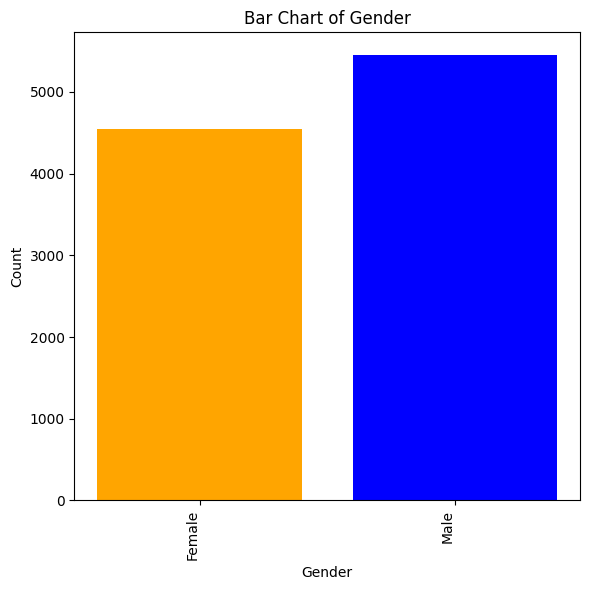

In [668]:
plot_colored_bar_chart(data, 'Gender',{'Female': 'orange', 'Male': 'blue'})

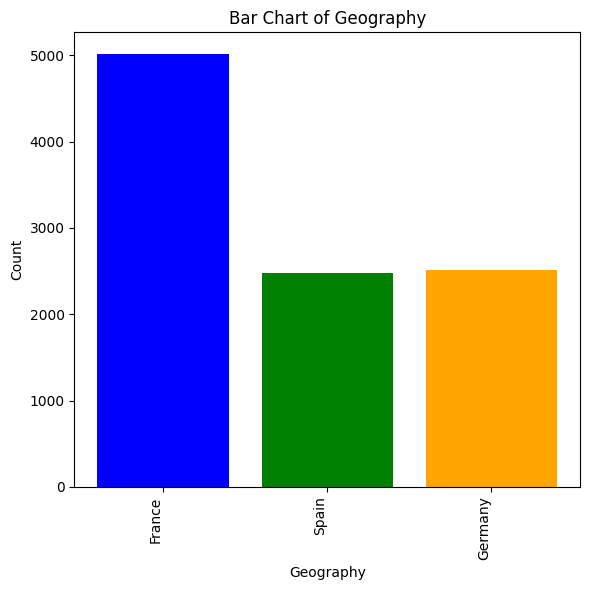

In [669]:
plot_colored_bar_chart(data,"Geography",{'France': 'blue', 'Germany': 'orange', 'Spain': 'green'})

In [670]:
data['Age'].info()
data['Age'].describe()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Age
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

## **Feature Engineering**

In [671]:
import pandas as pd

def create_age_categories(df, column_name):
    # Define the age ranges
    age_ranges = [(0, 17), (18, 29), (30, 39), (40, 49), (50, 59), (60, 69), (70, 79), (80, 89), (90, 920)]

    # Define labels for the age categories
    labels = ['Less than 18', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90 and above']
    max_age=df[column_name].max()
    # Use pd.cut() to create age categories based on the age ranges
    df['Age_Category'] = pd.cut(df[column_name], bins=[start - 0.5 for start, _ in age_ranges] + [max_age + 0.5],
                                 labels=labels)

    return df


data = create_age_categories(data, 'Age')


In [672]:
def derive_category(has_credit_card, is_active_member):

    if has_credit_card == 1 and is_active_member == 1:
        return 'Will_Stay'
    elif has_credit_card == 0 and is_active_member == 0:
        return 'Will_Not_Stay'
    elif has_credit_card == 0 and is_active_member == 1:
        return 'Potential_To_Stay'
    elif has_credit_card == 1 and is_active_member == 0:
        return 'Potential_To_Not_Stay'
    else:
        return 'Unknown'

def derive_new_category_column(df):
    df['Category'] = df.apply(lambda row: derive_category(row['HasCrCard'], row['IsActiveMember']), axis=1)
    return df

data=derive_new_category_column(data)

In [673]:
data['IsActive_by_CreditCard'] = data['HasCrCard'] * data['IsActiveMember']
data['BalanceSalaryRatio'] = data['Balance'] / data['EstimatedSalary']
data['LoyaltyScore'] = data['Tenure'] * (1 + data['IsActiveMember'])
data['Products_Per_Tenure'] =  data['Tenure'] / data['NumOfProducts']

In [674]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Category,Category,IsActive_by_CreditCard,BalanceSalaryRatio,LoyaltyScore,Products_Per_Tenure
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40-49,Will_Stay,1,0.000000,4,2.000000
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-49,Potential_To_Stay,0,0.744677,2,1.000000
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-49,Potential_To_Not_Stay,0,1.401375,8,2.666667
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-39,Will_Not_Stay,0,0.000000,1,0.500000
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-49,Will_Stay,1,1.587055,4,2.000000


In [675]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode_columns(df, columns):

    # Copy the original DataFrame to avoid modifying the original data
    encoded_df = df.copy()

    # Initialize OneHotEncoder
    encoder = OneHotEncoder(sparse=False, drop=None)

    # Perform one-hot encoding for each specified column
    for column in columns:
        # Extract the column values
        column_data = encoded_df[[column]]

        # Fit and transform the OneHotEncoder on the column data
        encoded_column_data = encoder.fit_transform(column_data)

        # Create column names for the one-hot encoded features
        feature_names = encoder.get_feature_names_out([column])

        # Create a DataFrame from the one-hot encoded features with proper column names
        encoded_column_df = pd.DataFrame(encoded_column_data, columns=feature_names, index=encoded_df.index)

        # Concatenate the one-hot encoded columns with the original DataFrame
        encoded_df = pd.concat([encoded_df, encoded_column_df], axis=1)

    return encoded_df

# columns_to_encode = ['Gender', 'Geography','NumOfProducts','Age_Category']
columns_to_encode = ['Gender', 'Geography','NumOfProducts','Age_Category','Category']
data = one_hot_encode_columns(data, columns_to_encode)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [676]:
print(data.columns)
data.head()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Age_Category',
       'Category', 'IsActive_by_CreditCard', 'BalanceSalaryRatio',
       'LoyaltyScore', 'Products_Per_Tenure', 'Gender_Female', 'Gender_Male',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'NumOfProducts_1', 'NumOfProducts_2', 'NumOfProducts_3',
       'NumOfProducts_4', 'Age_Category_18-29', 'Age_Category_30-39',
       'Age_Category_40-49', 'Age_Category_50-59', 'Age_Category_60-69',
       'Age_Category_70-79', 'Age_Category_80-89', 'Age_Category_90 and above',
       'Category_Potential_To_Not_Stay', 'Category_Potential_To_Stay',
       'Category_Will_Not_Stay', 'Category_Will_Stay'],
      dtype='object')


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Age_Category_40-49,Age_Category_50-59,Age_Category_60-69,Age_Category_70-79,Age_Category_80-89,Age_Category_90 and above,Category_Potential_To_Not_Stay,Category_Potential_To_Stay,Category_Will_Not_Stay,Category_Will_Stay
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [677]:
def drop_columns(df, columns_to_drop):
    return df.drop(columns=columns_to_drop, axis=1)

columns_to_drop=["RowNumber","CustomerId","Surname","Geography","Gender","Age_Category","Category"]
data = drop_columns(data, columns_to_drop)

## **Model Training**

In [678]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def evaluate_model(X, y, model):
    # Create pipeline with scaler and model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', model)
    ])

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model using pipeline
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Create DataFrame for evaluation metrics
    evaluation_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
        'Score': [accuracy, precision, recall, f1]
    })

    return evaluation_df

# Example usage:
# evaluation_results = evaluate_model(X, y, model)
# print("Evaluation Results:")
# print(evaluation_results)


In [679]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

def plot_confusion_matrix(X, y, model, labels):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    # Create a DataFrame for better visualization
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', linewidths=0.5, cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Example usage:
# plot_confusion_matrix(X, y, model, labels=['class1', 'class2', ...])



In [680]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

def plot_roc_curve(X, y, model):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict probabilities for positive class
    y_probs = model.predict_proba(X_test)[:, 1]

    # Calculate false positive rate and true positive rate
    fpr, tpr, _ = roc_curve(y_test, y_probs)

    # Calculate AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Example usage:
# plot_roc_curve(X, y, model)


In [681]:
X=data.drop(columns=["Exited"],axis=1)
y=data["Exited"]

## **XGBClassifier**

In [682]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Initialize XGBoost model
xgb_model = XGBClassifier()

# Evaluate the XGBoost model
xgb_evaluation_results = evaluate_model(X, y, xgb_model)
print("XGBoost Evaluation Results:")
xgb_evaluation_results

XGBoost Evaluation Results:


,Metric,Score
0,Accuracy,0.858500
1,Precision,0.690972
2,Recall,0.506361
3,F1-Score,0.584435


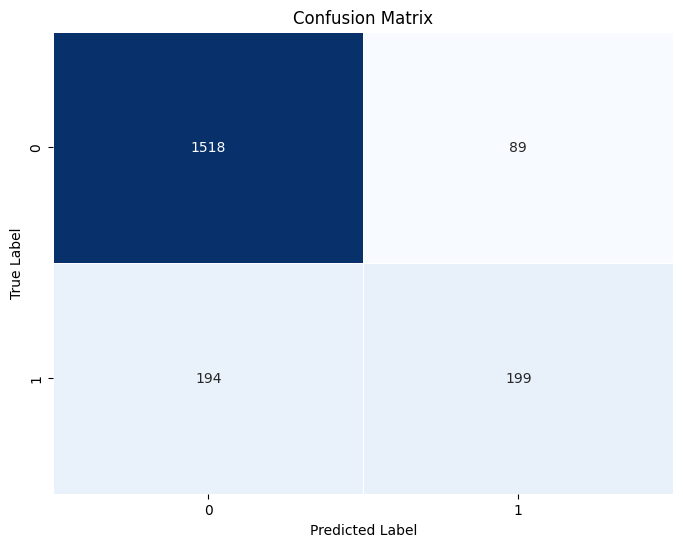

In [683]:
# Plot the confusion matrix for XGBoost
plot_confusion_matrix(X, y, xgb_model, labels=[0, 1])

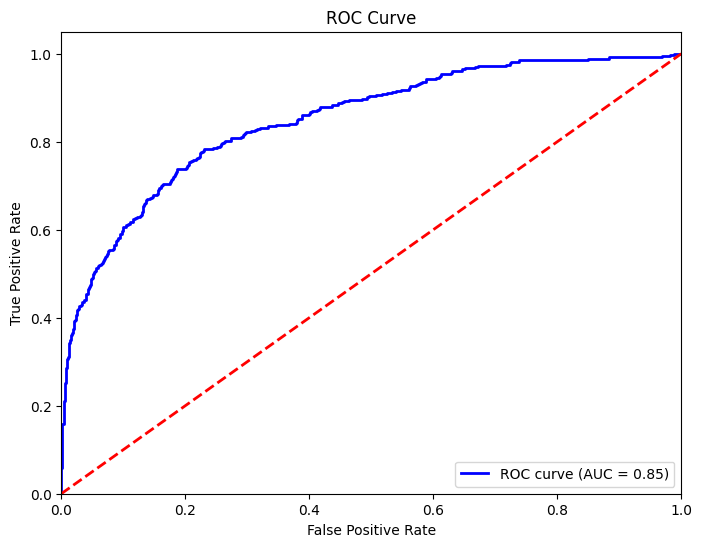

In [684]:
# Plot the ROC curve for XGBoost
plot_roc_curve(X, y, xgb_model)

## **LGBM Classifer**

In [685]:

# Initialize LightGBM model
lgbm_model = LGBMClassifier()

# Evaluate the LightGBM model
lgbm_evaluation_results = evaluate_model(X, y, lgbm_model)
print("LightGBM Evaluation Results:")
lgbm_evaluation_results

[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1188
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267
LightGBM Evaluation Results:


,Metric,Score
0,Accuracy,0.866000
1,Precision,0.732342
2,Recall,0.501272
3,F1-Score,0.595166


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1190
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267


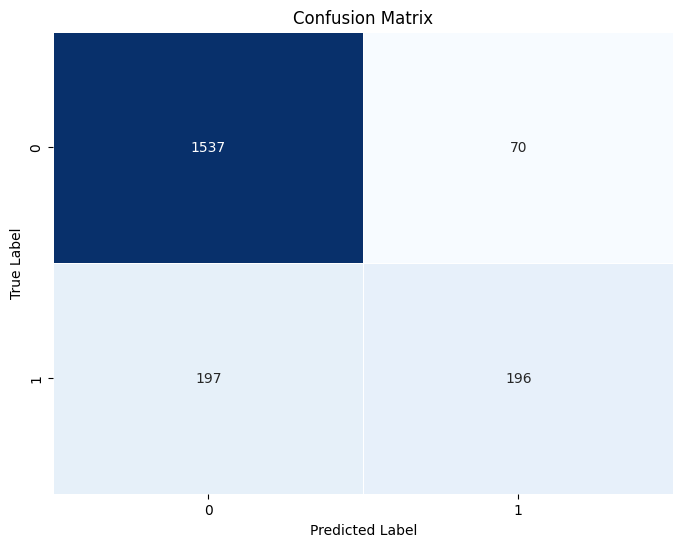

In [686]:
# Plot the confusion matrix for LightGBM
plot_confusion_matrix(X, y, lgbm_model, labels=[0, 1])


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1190
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267


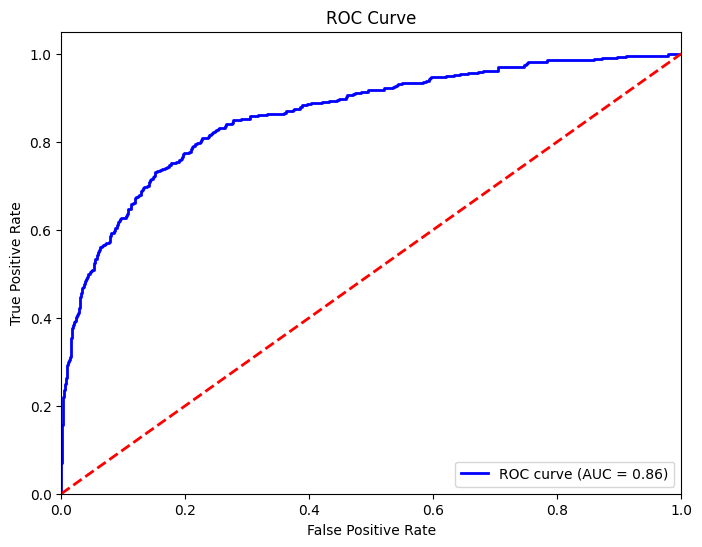

In [687]:
plot_roc_curve(X, y, lgbm_model)

## **Random Forest Classifier**

In [688]:
# Initialize Random Forest model
rf_model = RandomForestClassifier()

# Evaluate the Random Forest model
rf_evaluation_results = evaluate_model(X, y, rf_model)
print("Random Forest Evaluation Results:")
rf_evaluation_results

Random Forest Evaluation Results:


,Metric,Score
0,Accuracy,0.865500
1,Precision,0.750000
2,Recall,0.473282
3,F1-Score,0.580343


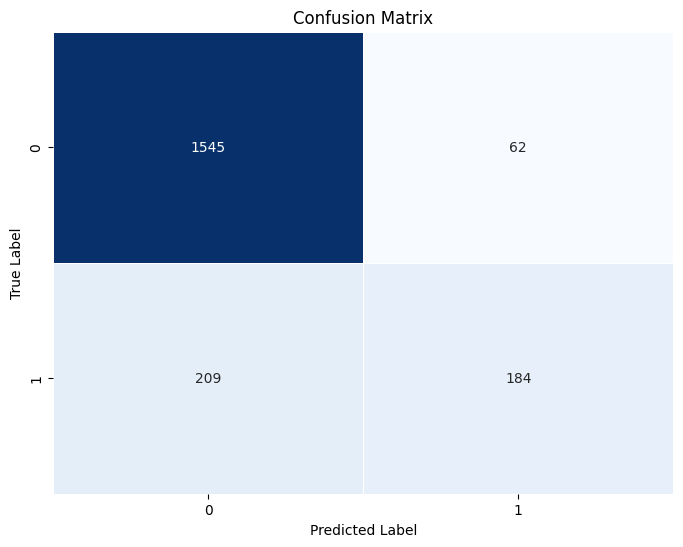

In [689]:
# Plot the confusion matrix for Random Forest
plot_confusion_matrix(X, y, rf_model, labels=[0, 1])

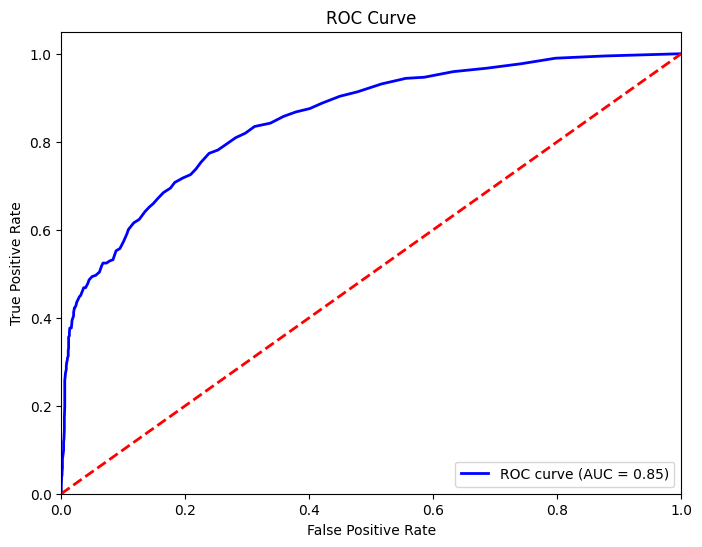

In [690]:
# Plot the ROC curve for Random Forest
plot_roc_curve(X, y, rf_model)